In [7]:
import tensorflow as tf #pip install tensor flow shift+enteer

# loading mnist data set
## contain 60,000 training sample and 10,000 testing sample
## keras is an API directly installed when tensorflow get installed
## keras is used make the implementation of neural networks

In [10]:
mnist=tf.keras.datasets.mnist #contain handwritten characters from 0 to 9

# After loading the MNIST data,divide into train and test datasets

In [11]:
#unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [14]:
x_train.shape #used .shape to fetch dimensions of objects

(60000, 28, 28)

In [16]:
import matplotlib.pyplot as plt #to plot the images

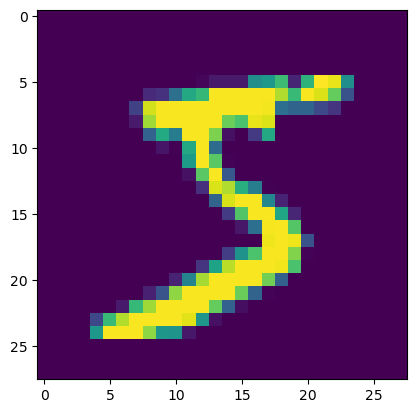

In [20]:
plt.imshow(x_train[0])# to show the first image
plt.show() #to execute the graph
#it executes and shows color image

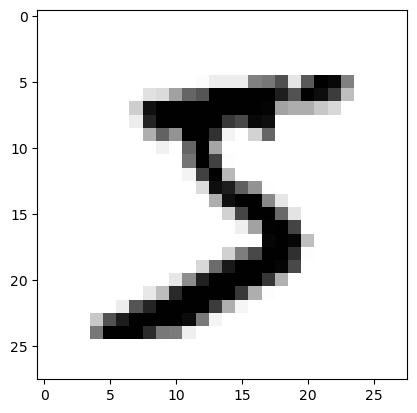

In [23]:
plt.imshow(x_train[0],cmap=plt.cm.binary) #to get binary image

In [24]:
# if picture is near to white it is 255
# if picture is near to black it is 0

## checkig the values of each pixel

In [26]:
print(x_train[0]) #prints the pixel

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.

## Normalizing the data|Pre-processing step

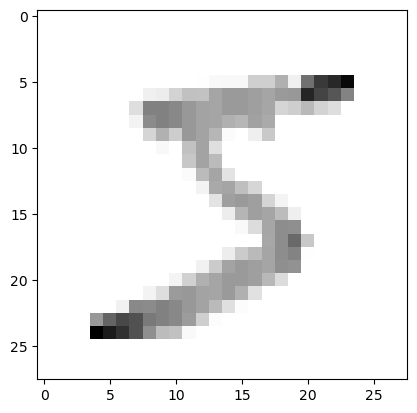

In [31]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [33]:
print(x_train[0]) ##values are form 0 to 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [34]:
print(y_train[0]) #y_train() contains labels of x_train

5


## Resizing image to make it suitable for apply convoltion operation

In [87]:
import numpy as np
IMG_SIZE=28
# to increase one dimension for kernal operation
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimensions",x_trainr.shape)
print("Testing samples dimensions",x_testr.shape)

Training samples dimensions (60000, 28, 28, 1)
Testing samples dimensions (10000, 28, 28, 1)


## Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

## Convolutional layer is a hidden layer that contains several convolution units in a convolutional neural network, which is used for feature extraction

In [45]:
model=Sequential()
# 1st convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:])) # only for first convolution layer to mention input layer size
model.add(Activation("relu")) #activation function to make non-linear if values <0 remove values, it does not activate all the neurons at the same time
model.add(MaxPooling2D(pool_size=(2,2))) #MAxpooling 2X2 matrix

# 2nd convolution layer
model.add(Conv2D(64,(3,3))) # only for first convolution layer to mention input layer size
model.add(Activation("relu")) #activation function to make non-linear if values <0 remove values, it does not activate all the neurons at the same time
model.add(MaxPooling2D(pool_size=(2,2))) #MAxpooling 2X2 matrix

#3rd convolution layer
model.add(Conv2D(64,(3,3))) # only for first convolution layer to mention input layer size
model.add(Activation("relu")) #activation function to make non-linear if values <0 remove values, it does not activate all the neurons at the same time
model.add(MaxPooling2D(pool_size=(2,2))) #MAxpooling 2X2 matrix

##fully connected layer 
model.add(Flatten()) #before using fully connected layer,need to be flatten so that coverts 2D to 1D
model.add(Dense(64)) #Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves
model.add(Activation("relu"))

## fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#Last fully connected layer,output must be equal to number classes, 10(0-9)
model.add(Dense(10))
model.add(Activation('softmax')) #activation function is changed to softmax(class probabilities)


In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [49]:
print("Total Training samples=",len(x_trainr))

Total Training samples= 60000


In [50]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [53]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3) #training the model

Epoch 1/5
1313/1313 [==============================] - 52s 39ms/step - loss: 0.3187 - accuracy: 0.8993 - val_loss: 0.1257 - val_accuracy: 0.9615
Epoch 2/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.1001 - accuracy: 0.9696 - val_loss: 0.1274 - val_accuracy: 0.9638
Epoch 3/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0690 - val_accuracy: 0.9791
Epoch 4/5
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0769 - val_accuracy: 0.9777
Epoch 5/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0699 - val_accuracy: 0.9801


In [54]:
#evaluating on testing data set MNIT
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Acuuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0624 - accuracy: 0.9822
Test loss on 10,000 test samples 0.062357038259506226
Validation Acuuracy on 10,000 test samples 0.982200026512146


In [56]:
predictions=model.predict([x_testr]) #to save the model 

313/313 [==============================] - 3s 8ms/step


In [57]:
print(predictions)

[[1.0357286e-05 1.4526418e-05 1.3481870e-05 ... 9.9995136e-01
  1.4395184e-07 5.6740037e-06]
 [4.1281466e-05 3.4421287e-06 9.9994910e-01 ... 4.5091974e-06
  9.6893143e-07 3.7930153e-07]
 [1.9279372e-07 9.9998105e-01 4.5179482e-07 ... 1.8315953e-06
  1.6217467e-07 2.2088834e-06]
 ...
 [3.2862819e-09 1.6759382e-09 7.6013844e-09 ... 1.4376624e-09
  4.8357305e-07 2.1020246e-06]
 [8.2451766e-07 5.8797778e-10 1.9258962e-11 ... 2.5170107e-12
  1.4018900e-06 4.9348781e-08]
 [3.8724346e-04 3.5909429e-07 2.5838422e-06 ... 5.4647296e-09
  3.2777738e-05 4.4078963e-05]]


In [58]:
print(np.argmax(predictions[0]))

7


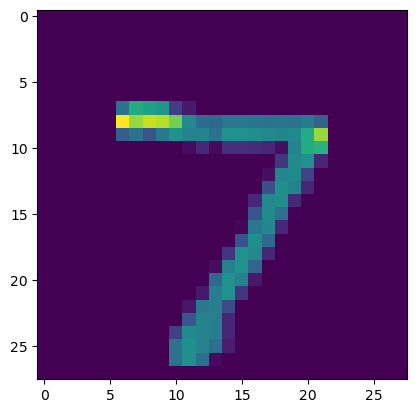

In [59]:
plt.imshow(x_test[0])

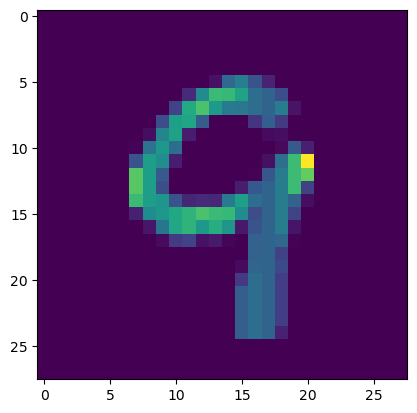

In [60]:
plt.imshow(x_test[150])

In [61]:
print(np.argmax(predictions[150]))

9


In [89]:
import cv2

In [110]:
img=cv2.imread("nine.png")

TypeError: Image data of dtype object cannot be converted to float

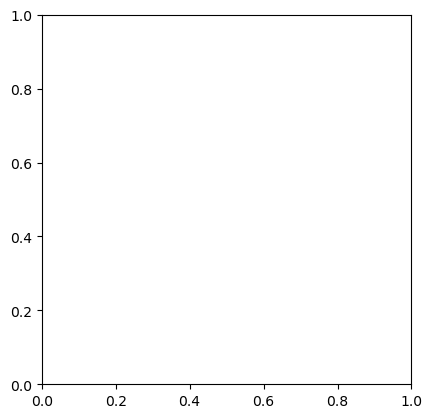

In [117]:
plt.imshow(img)

In [109]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [107]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [108]:
risized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

NameError: name 'gray' is not defined